In [1]:
#importing libraries
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing data
deli = pd.read_csv("/kaggle/input/ball-by-ball-it20/ball_by_ball_it20.csv")

In [3]:
deli

,Unnamed: 0,Match ID,Date,Venue,Bat First,Bat Second,Innings,Over,Ball,Batter,...,Winner,Chased Successfully,Total Batter Runs,Total Non Striker Runs,Batter Balls Faced,Non Striker Balls Faced,Player Out Runs,Player Out Balls Faced,Bowler Runs Conceded,Valid Ball
0,0,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,1,BA King,...,South Africa,1,1,0,1,0,NaN,NaN,1,1
1,1,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,2,KR Mayers,...,South Africa,1,1,1,1,1,NaN,NaN,1,1
2,2,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,3,BA King,...,South Africa,1,0,1,0,1,1.0,2.0,0,1
3,3,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,4,J Charles,...,South Africa,1,0,1,1,1,NaN,NaN,0,1
4,4,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,5,J Charles,...,South Africa,1,4,1,2,1,NaN,NaN,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425114,425114,1187667,2019-11-05,Saxton Oval,New Zealand,England,2,20,2,TK Curran,...,New Zealand,0,11,2,9,2,NaN,NaN,0,1
425115,425115,1187667,2019-11-05,Saxton Oval,New Zealand,England,2,20,3,TK Curran,...,New Zealand,0,12,2,10,2,NaN,NaN,1,1
425116,425116,1187667,2019-11-05,Saxton Oval,New Zealand,England,2,20,4,S Mahmood,...,New Zealand,0,2,12,3,10,NaN,NaN,0,1
425117,425117,1187667,2019-11-05,Saxton Oval,New Zealand,England,2,20,5,S Mahmood,...,New Zealand,0,3,12,4,10,NaN,NaN,1,1


# **Data Cleaning**

In [4]:
#dropping unnamed columns
deli.drop("Unnamed: 0", axis=1, inplace=True)

In [5]:
#converting Date to datetime
deli["Date"] = pd.to_datetime(deli["Date"])

In [6]:
#finding columns containing na values
deli.isna().sum()

Match ID                        0
Date                            0
Venue                           0
Bat First                       0
Bat Second                      0
Innings                         0
Over                            0
Ball                            0
Batter                          0
Non Striker                     0
Bowler                          0
Batter Runs                     0
Extra Runs                      0
Runs From Ball                  0
Ball Rebowled                   0
Extra Type                      0
Wicket                          0
Method                     401460
Player Out                 401460
Innings Runs                    0
Innings Wickets                 0
Target Score                    0
Runs to Get                224815
Balls Remaining                 0
Winner                          0
Chased Successfully             0
Total Batter Runs               0
Total Non Striker Runs          0
Batter Balls Faced              0
Non Striker Ba

In [7]:
deli.Method

0            NaN
1            NaN
2         caught
3            NaN
4            NaN
           ...  
425114       NaN
425115       NaN
425116       NaN
425117       NaN
425118       NaN
Name: Method, Length: 425119, dtype: object

In [8]:
#converting column names to lower and replacing spaces with _
deli.columns = [col.lower() for col in deli.columns]
deli.columns = [col.replace(" ", "_") for col in deli.columns]

In [9]:
deli.head()

,match_id,date,venue,bat_first,bat_second,innings,over,ball,batter,non_striker,...,winner,chased_successfully,total_batter_runs,total_non_striker_runs,batter_balls_faced,non_striker_balls_faced,player_out_runs,player_out_balls_faced,bowler_runs_conceded,valid_ball
0,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,1,BA King,KR Mayers,...,South Africa,1,1,0,1,0,NaN,NaN,1,1
1,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,2,KR Mayers,BA King,...,South Africa,1,1,1,1,1,NaN,NaN,1,1
2,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,3,BA King,KR Mayers,...,South Africa,1,0,1,0,1,1.0,2.0,0,1
3,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,4,J Charles,KR Mayers,...,South Africa,1,0,1,1,1,NaN,NaN,0,1
4,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,5,J Charles,KR Mayers,...,South Africa,1,4,1,2,1,NaN,NaN,4,1


In [10]:
#adding total_runs column for each delivery
deli["total_runs"] = deli["batter_runs"] + deli["extra_runs"]

In [11]:
deli.describe()

,match_id,date,innings,over,ball,batter_runs,extra_runs,runs_from_ball,ball_rebowled,wicket,...,chased_successfully,total_batter_runs,total_non_striker_runs,batter_balls_faced,non_striker_balls_faced,player_out_runs,player_out_balls_faced,bowler_runs_conceded,valid_ball,total_runs
count,4.251190e+05,425119,425119.000000,425119.000000,425119.000000,425119.000000,425119.000000,425119.000000,425119.000000,425119.000000,...,425119.000000,425119.00000,425119.000000,425119.000000,425119.000000,23659.000000,23659.000000,425119.000000,425119.000000,425119.000000
mean,1.089415e+06,2019-01-14 03:50:20.333600768,1.471172,9.959395,3.486377,1.139502,0.075132,1.214634,0.040189,0.055653,...,0.483994,14.71182,13.952406,12.486560,12.138455,15.386280,13.853502,1.187710,0.959811,1.214634
min,2.110280e+05,2005-02-17 00:00:00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.513730e+05,2016-03-09 00:00:00,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.00000,2.000000,4.000000,3.000000,2.000000,5.000000,0.000000,1.000000,0.000000
50%,1.233980e+06,2021-02-11 00:00:00,1.000000,10.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,9.00000,8.000000,9.000000,9.000000,9.000000,10.000000,1.000000,1.000000,1.000000
75%,1.310948e+06,2022-07-12 00:00:00,2.000000,15.000000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,21.00000,20.000000,18.000000,18.000000,22.000000,20.000000,1.000000,1.000000,1.000000
max,1.393328e+06,2023-08-22 00:00:00,2.000000,20.000000,7.000000,7.000000,6.000000,8.000000,1.000000,1.000000,...,1.000000,172.00000,168.000000,76.000000,74.000000,172.000000,76.000000,8.000000,1.000000,8.000000
std,3.224052e+05,NaN,0.499169,5.633134,1.708903,1.546020,0.359310,1.536030,0.196402,0.229250,...,0.499744,16.64172,15.976979,11.475981,11.336384,17.408768,11.983127,1.539459,0.196402,1.536030


In [12]:
#delaing with na values in method column
deli.method.fillna("No Wicket", inplace=True)

In [13]:
deli.runs_to_get

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
425114    19.0
425115    18.0
425116    18.0
425117    17.0
425118    15.0
Name: runs_to_get, Length: 425119, dtype: float64

In [14]:
#creating data for each innings to get total_runs innings wise using match_id
tot_run_group = deli.groupby(["match_id", "innings"])["total_runs"].sum().reset_index()
tot_run_group

,match_id,innings,total_runs
0,211028,1,179
1,211028,2,79
2,211048,1,214
3,211048,2,170
4,222678,1,133
...,...,...,...
3679,1393311,2,180
3680,1393312,1,186
3681,1393312,2,125
3682,1393328,1,154


In [15]:
#viewing unique teams that participated
teams = list(set(deli["bat_first"].to_list()).intersection(deli["bat_second"].to_list()))
teams.sort()
teams

['Afghanistan',
 'Argentina',
 'Australia',
 'Austria',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Belgium',
 'Belize',
 'Bermuda',
 'Bhutan',
 'Botswana',
 'Bulgaria',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'China',
 'Cook Islands',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'England',
 'Estonia',
 'Eswatini',
 'Fiji',
 'Finland',
 'France',
 'Gambia',
 'Germany',
 'Ghana',
 'Gibraltar',
 'Greece',
 'Guernsey',
 'Hong Kong',
 'Hungary',
 'India',
 'Indonesia',
 'Ireland',
 'Isle of Man',
 'Israel',
 'Italy',
 'Japan',
 'Jersey',
 'Kenya',
 'Kuwait',
 'Lesotho',
 'Luxembourg',
 'Malawi',
 'Malaysia',
 'Maldives',
 'Mali',
 'Malta',
 'Mozambique',
 'Myanmar',
 'Namibia',
 'Nepal',
 'Netherlands',
 'New Zealand',
 'Nigeria',
 'Norway',
 'Oman',
 'Pakistan',
 'Panama',
 'Papua New Guinea',
 'Philippines',
 'Portugal',
 'Qatar',
 'Romania',
 'Rwanda',
 'Samoa',
 'Saudi Arabia',
 'Scotland',
 'Serbia',
 'Seychelles',
 'Sierra Leone',
 'Singapore',
 'Slovenia',
 'South Africa'

In [16]:
# val_count = deli["bat_first"].value_counts()
# mask = val_count > 10000
# deli = deli[deli["bat_first"].isin(val_count.index[mask])]

In [17]:
# deli["bat_first"].unique()

In [18]:
#renaming total_runs and creating data for innings 1
tot_run_group.rename(columns={"total_runs":"full_inning_runs"}, inplace=True)
inning_1 = tot_run_group[tot_run_group["innings"] == 1]

In [19]:
deli.columns

Index(['match_id', 'date', 'venue', 'bat_first', 'bat_second', 'innings',
       'over', 'ball', 'batter', 'non_striker', 'bowler', 'batter_runs',
       'extra_runs', 'runs_from_ball', 'ball_rebowled', 'extra_type', 'wicket',
       'method', 'player_out', 'innings_runs', 'innings_wickets',
       'target_score', 'runs_to_get', 'balls_remaining', 'winner',
       'chased_successfully', 'total_batter_runs', 'total_non_striker_runs',
       'batter_balls_faced', 'non_striker_balls_faced', 'player_out_runs',
       'player_out_balls_faced', 'bowler_runs_conceded', 'valid_ball',
       'total_runs'],
      dtype='object')

In [20]:
#inning 1 data merging with deli
inning_1 = deli.merge(inning_1, on=["match_id", "innings"])

In [21]:
inning_1

,match_id,date,venue,bat_first,bat_second,innings,over,ball,batter,non_striker,...,total_batter_runs,total_non_striker_runs,batter_balls_faced,non_striker_balls_faced,player_out_runs,player_out_balls_faced,bowler_runs_conceded,valid_ball,total_runs,full_inning_runs
0,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,1,BA King,KR Mayers,...,1,0,1,0,NaN,NaN,1,1,1,258
1,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,2,KR Mayers,BA King,...,1,1,1,1,NaN,NaN,1,1,1,258
2,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,3,BA King,KR Mayers,...,0,1,0,1,1.0,2.0,0,1,0,258
3,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,4,J Charles,KR Mayers,...,0,1,1,1,NaN,NaN,0,1,0,258
4,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,5,J Charles,KR Mayers,...,4,1,2,1,NaN,NaN,4,1,4,258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224810,1187667,2019-11-05,Saxton Oval,New Zealand,England,1,20,2,TG Southee,MJ Santner,...,1,8,1,6,NaN,NaN,1,1,1,180
224811,1187667,2019-11-05,Saxton Oval,New Zealand,England,1,20,3,MJ Santner,TG Southee,...,10,1,7,1,NaN,NaN,2,1,2,180
224812,1187667,2019-11-05,Saxton Oval,New Zealand,England,1,20,4,MJ Santner,TG Southee,...,14,1,8,1,NaN,NaN,4,1,4,180
224813,1187667,2019-11-05,Saxton Oval,New Zealand,England,1,20,5,MJ Santner,TG Southee,...,15,1,9,1,NaN,NaN,1,1,1,180


In [22]:
#getting the cumulative sum of runs ball wise
in_1_cumulative = inning_1.groupby("match_id")["total_runs"].cumsum()
in_1_cumulative

0           1
1           2
2           2
3           2
4           6
         ... 
224810    173
224811    175
224812    179
224813    180
224814    180
Name: total_runs, Length: 224815, dtype: int64

In [23]:
#adding cumulative runs column as cumulative
inning_1["cumulative"] = in_1_cumulative

In [24]:
inning_1

,match_id,date,venue,bat_first,bat_second,innings,over,ball,batter,non_striker,...,total_non_striker_runs,batter_balls_faced,non_striker_balls_faced,player_out_runs,player_out_balls_faced,bowler_runs_conceded,valid_ball,total_runs,full_inning_runs,cumulative
0,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,1,BA King,KR Mayers,...,0,1,0,NaN,NaN,1,1,1,258,1
1,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,2,KR Mayers,BA King,...,1,1,1,NaN,NaN,1,1,1,258,2
2,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,3,BA King,KR Mayers,...,1,0,1,1.0,2.0,0,1,0,258,2
3,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,4,J Charles,KR Mayers,...,1,1,1,NaN,NaN,0,1,0,258,2
4,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,5,J Charles,KR Mayers,...,1,2,1,NaN,NaN,4,1,4,258,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224810,1187667,2019-11-05,Saxton Oval,New Zealand,England,1,20,2,TG Southee,MJ Santner,...,8,1,6,NaN,NaN,1,1,1,180,173
224811,1187667,2019-11-05,Saxton Oval,New Zealand,England,1,20,3,MJ Santner,TG Southee,...,1,7,1,NaN,NaN,2,1,2,180,175
224812,1187667,2019-11-05,Saxton Oval,New Zealand,England,1,20,4,MJ Santner,TG Southee,...,1,8,1,NaN,NaN,4,1,4,180,179
224813,1187667,2019-11-05,Saxton Oval,New Zealand,England,1,20,5,MJ Santner,TG Southee,...,1,9,1,NaN,NaN,1,1,1,180,180


In [25]:
#preparing to modify innings 2 data
inning_2 = tot_run_group[tot_run_group["innings"] == 2]
inning_2

,match_id,innings,full_inning_runs
1,211028,2,79
3,211048,2,170
5,222678,2,134
7,225263,2,148
9,225271,2,161
...,...,...,...
3675,1393309,2,106
3677,1393310,2,146
3679,1393311,2,180
3681,1393312,2,125


In [26]:
#innings_2 data
inning_2 = deli.merge(inning_2, on=["match_id", "innings"])

In [27]:
#adding cumulative runs column as cumulative 
inning_2["cumulative"] = inning_2.groupby("match_id")["total_runs"].cumsum()

In [28]:
inning_2

,match_id,date,venue,bat_first,bat_second,innings,over,ball,batter,non_striker,...,total_non_striker_runs,batter_balls_faced,non_striker_balls_faced,player_out_runs,player_out_balls_faced,bowler_runs_conceded,valid_ball,total_runs,full_inning_runs,cumulative
0,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,2,1,1,Q de Kock,RR Hendricks,...,0,1,0,NaN,NaN,4,1,4,259,4
1,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,2,1,2,Q de Kock,RR Hendricks,...,0,2,0,NaN,NaN,4,1,4,259,8
2,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,2,1,3,Q de Kock,RR Hendricks,...,0,3,0,NaN,NaN,0,1,0,259,8
3,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,2,1,4,Q de Kock,RR Hendricks,...,0,4,0,NaN,NaN,0,1,0,259,8
4,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,2,1,5,Q de Kock,RR Hendricks,...,0,5,0,NaN,NaN,1,1,1,259,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200299,1187667,2019-11-05,Saxton Oval,New Zealand,England,2,20,2,TK Curran,S Mahmood,...,2,9,2,NaN,NaN,0,1,0,166,162
200300,1187667,2019-11-05,Saxton Oval,New Zealand,England,2,20,3,TK Curran,S Mahmood,...,2,10,2,NaN,NaN,1,1,1,166,163
200301,1187667,2019-11-05,Saxton Oval,New Zealand,England,2,20,4,S Mahmood,TK Curran,...,12,3,10,NaN,NaN,0,1,0,166,163
200302,1187667,2019-11-05,Saxton Oval,New Zealand,England,2,20,5,S Mahmood,TK Curran,...,12,4,10,NaN,NaN,1,1,1,166,164


In [29]:
inning_2.runs_to_get

0         255.0
1         251.0
2         251.0
3         251.0
4         250.0
          ...  
200299     19.0
200300     18.0
200301     18.0
200302     17.0
200303     15.0
Name: runs_to_get, Length: 200304, dtype: float64

In [30]:
inning_1.balls_remaining

0         119
1         118
2         117
3         116
4         115
         ... 
224810      4
224811      3
224812      2
224813      1
224814      0
Name: balls_remaining, Length: 224815, dtype: int64

In [31]:
deli.wicket.unique()

array([0, 1])

In [32]:
#adding wickets left column to innings 1
inning_1["wickets_left"] = 10 - inning_1["innings_wickets"]

In [33]:
#adding wickets left column to innings 2
inning_2["wickets_left"] = 10 - inning_2["innings_wickets"]

In [34]:
#adding run_rate column to innings 1
inning_1["run_rate"] = inning_1["cumulative"]*6/(120-inning_1["balls_remaining"])

In [35]:
#adding run_rate column to innings 2
inning_2["run_rate"] = inning_2["cumulative"]*6/(120-inning_2["balls_remaining"])

In [36]:
inning_1

,match_id,date,venue,bat_first,bat_second,innings,over,ball,batter,non_striker,...,non_striker_balls_faced,player_out_runs,player_out_balls_faced,bowler_runs_conceded,valid_ball,total_runs,full_inning_runs,cumulative,wickets_left,run_rate
0,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,1,BA King,KR Mayers,...,0,NaN,NaN,1,1,1,258,1,10,6.000000
1,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,2,KR Mayers,BA King,...,1,NaN,NaN,1,1,1,258,2,10,6.000000
2,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,3,BA King,KR Mayers,...,1,1.0,2.0,0,1,0,258,2,9,4.000000
3,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,4,J Charles,KR Mayers,...,1,NaN,NaN,0,1,0,258,2,9,3.000000
4,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,5,J Charles,KR Mayers,...,1,NaN,NaN,4,1,4,258,6,9,7.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224810,1187667,2019-11-05,Saxton Oval,New Zealand,England,1,20,2,TG Southee,MJ Santner,...,6,NaN,NaN,1,1,1,180,173,4,8.948276
224811,1187667,2019-11-05,Saxton Oval,New Zealand,England,1,20,3,MJ Santner,TG Southee,...,1,NaN,NaN,2,1,2,180,175,4,8.974359
224812,1187667,2019-11-05,Saxton Oval,New Zealand,England,1,20,4,MJ Santner,TG Southee,...,1,NaN,NaN,4,1,4,180,179,4,9.101695
224813,1187667,2019-11-05,Saxton Oval,New Zealand,England,1,20,5,MJ Santner,TG Southee,...,1,NaN,NaN,1,1,1,180,180,4,9.075630


In [37]:
inning_2

,match_id,date,venue,bat_first,bat_second,innings,over,ball,batter,non_striker,...,non_striker_balls_faced,player_out_runs,player_out_balls_faced,bowler_runs_conceded,valid_ball,total_runs,full_inning_runs,cumulative,wickets_left,run_rate
0,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,2,1,1,Q de Kock,RR Hendricks,...,0,NaN,NaN,4,1,4,259,4,10,24.000000
1,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,2,1,2,Q de Kock,RR Hendricks,...,0,NaN,NaN,4,1,4,259,8,10,24.000000
2,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,2,1,3,Q de Kock,RR Hendricks,...,0,NaN,NaN,0,1,0,259,8,10,16.000000
3,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,2,1,4,Q de Kock,RR Hendricks,...,0,NaN,NaN,0,1,0,259,8,10,12.000000
4,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,2,1,5,Q de Kock,RR Hendricks,...,0,NaN,NaN,1,1,1,259,9,10,10.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200299,1187667,2019-11-05,Saxton Oval,New Zealand,England,2,20,2,TK Curran,S Mahmood,...,2,NaN,NaN,0,1,0,166,162,3,8.379310
200300,1187667,2019-11-05,Saxton Oval,New Zealand,England,2,20,3,TK Curran,S Mahmood,...,2,NaN,NaN,1,1,1,166,163,3,8.358974
200301,1187667,2019-11-05,Saxton Oval,New Zealand,England,2,20,4,S Mahmood,TK Curran,...,10,NaN,NaN,0,1,0,166,163,3,8.288136
200302,1187667,2019-11-05,Saxton Oval,New Zealand,England,2,20,5,S Mahmood,TK Curran,...,10,NaN,NaN,1,1,1,166,164,3,8.268908


In [38]:
#calculating required run rate
inning_2.runs_to_get

0         255.0
1         251.0
2         251.0
3         251.0
4         250.0
          ...  
200299     19.0
200300     18.0
200301     18.0
200302     17.0
200303     15.0
Name: runs_to_get, Length: 200304, dtype: float64

In [39]:
#adding required_run_rate column to innings 2
inning_2["required_run_rate"] = round(inning_2["runs_to_get"]/((inning_2["balls_remaining"])*0.1/6),2)

In [40]:
inning_2

,match_id,date,venue,bat_first,bat_second,innings,over,ball,batter,non_striker,...,player_out_runs,player_out_balls_faced,bowler_runs_conceded,valid_ball,total_runs,full_inning_runs,cumulative,wickets_left,run_rate,required_run_rate
0,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,2,1,1,Q de Kock,RR Hendricks,...,NaN,NaN,4,1,4,259,4,10,24.000000,128.57
1,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,2,1,2,Q de Kock,RR Hendricks,...,NaN,NaN,4,1,4,259,8,10,24.000000,127.63
2,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,2,1,3,Q de Kock,RR Hendricks,...,NaN,NaN,0,1,0,259,8,10,16.000000,128.72
3,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,2,1,4,Q de Kock,RR Hendricks,...,NaN,NaN,0,1,0,259,8,10,12.000000,129.83
4,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,2,1,5,Q de Kock,RR Hendricks,...,NaN,NaN,1,1,1,259,9,10,10.800000,130.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200299,1187667,2019-11-05,Saxton Oval,New Zealand,England,2,20,2,TK Curran,S Mahmood,...,NaN,NaN,0,1,0,166,162,3,8.379310,285.00
200300,1187667,2019-11-05,Saxton Oval,New Zealand,England,2,20,3,TK Curran,S Mahmood,...,NaN,NaN,1,1,1,166,163,3,8.358974,360.00
200301,1187667,2019-11-05,Saxton Oval,New Zealand,England,2,20,4,S Mahmood,TK Curran,...,NaN,NaN,0,1,0,166,163,3,8.288136,540.00
200302,1187667,2019-11-05,Saxton Oval,New Zealand,England,2,20,5,S Mahmood,TK Curran,...,NaN,NaN,1,1,1,166,164,3,8.268908,1020.00


In [41]:
#adding result column to innings 1
inning_1["result"] = inning_1.apply(lambda x: 1 if x["bat_first"] == x["winner"] else 0, axis=1)

In [42]:
inning_1

,match_id,date,venue,bat_first,bat_second,innings,over,ball,batter,non_striker,...,player_out_runs,player_out_balls_faced,bowler_runs_conceded,valid_ball,total_runs,full_inning_runs,cumulative,wickets_left,run_rate,result
0,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,1,BA King,KR Mayers,...,NaN,NaN,1,1,1,258,1,10,6.000000,0
1,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,2,KR Mayers,BA King,...,NaN,NaN,1,1,1,258,2,10,6.000000,0
2,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,3,BA King,KR Mayers,...,1.0,2.0,0,1,0,258,2,9,4.000000,0
3,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,4,J Charles,KR Mayers,...,NaN,NaN,0,1,0,258,2,9,3.000000,0
4,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,5,J Charles,KR Mayers,...,NaN,NaN,4,1,4,258,6,9,7.200000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224810,1187667,2019-11-05,Saxton Oval,New Zealand,England,1,20,2,TG Southee,MJ Santner,...,NaN,NaN,1,1,1,180,173,4,8.948276,1
224811,1187667,2019-11-05,Saxton Oval,New Zealand,England,1,20,3,MJ Santner,TG Southee,...,NaN,NaN,2,1,2,180,175,4,8.974359,1
224812,1187667,2019-11-05,Saxton Oval,New Zealand,England,1,20,4,MJ Santner,TG Southee,...,NaN,NaN,4,1,4,180,179,4,9.101695,1
224813,1187667,2019-11-05,Saxton Oval,New Zealand,England,1,20,5,MJ Santner,TG Southee,...,NaN,NaN,1,1,1,180,180,4,9.075630,1


In [43]:
#adding result column to innings 2
inning_2["result"] = inning_2.apply(lambda x: 1 if x["bat_second"] == x["winner"] else 0, axis=1)

In [44]:
inning_2

,match_id,date,venue,bat_first,bat_second,innings,over,ball,batter,non_striker,...,player_out_balls_faced,bowler_runs_conceded,valid_ball,total_runs,full_inning_runs,cumulative,wickets_left,run_rate,required_run_rate,result
0,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,2,1,1,Q de Kock,RR Hendricks,...,NaN,4,1,4,259,4,10,24.000000,128.57,1
1,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,2,1,2,Q de Kock,RR Hendricks,...,NaN,4,1,4,259,8,10,24.000000,127.63,1
2,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,2,1,3,Q de Kock,RR Hendricks,...,NaN,0,1,0,259,8,10,16.000000,128.72,1
3,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,2,1,4,Q de Kock,RR Hendricks,...,NaN,0,1,0,259,8,10,12.000000,129.83,1
4,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,2,1,5,Q de Kock,RR Hendricks,...,NaN,1,1,1,259,9,10,10.800000,130.43,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200299,1187667,2019-11-05,Saxton Oval,New Zealand,England,2,20,2,TK Curran,S Mahmood,...,NaN,0,1,0,166,162,3,8.379310,285.00,0
200300,1187667,2019-11-05,Saxton Oval,New Zealand,England,2,20,3,TK Curran,S Mahmood,...,NaN,1,1,1,166,163,3,8.358974,360.00,0
200301,1187667,2019-11-05,Saxton Oval,New Zealand,England,2,20,4,S Mahmood,TK Curran,...,NaN,0,1,0,166,163,3,8.288136,540.00,0
200302,1187667,2019-11-05,Saxton Oval,New Zealand,England,2,20,5,S Mahmood,TK Curran,...,NaN,1,1,1,166,164,3,8.268908,1020.00,0


In [45]:
#concatinating inning_1 and inning_2 and sorting values to group matches in previous form
all_innings = pd.concat([inning_1, inning_2]).sort_values(["date", "match_id", "innings", "over", "ball"], ascending=[False, False, True, True, True])

In [46]:
all_innings

,match_id,date,venue,bat_first,bat_second,innings,over,ball,batter,non_striker,...,player_out_balls_faced,bowler_runs_conceded,valid_ball,total_runs,full_inning_runs,cumulative,wickets_left,run_rate,result,required_run_rate
129463,1393328,2023-08-22,Gahanga International Cricket Stadium,Rwanda,Tanzania,1,1,1,D Ndikubwimana,E Dusingizimana,...,NaN,0,1,0,154,0,10,0.000000,0,NaN
129464,1393328,2023-08-22,Gahanga International Cricket Stadium,Rwanda,Tanzania,1,1,2,D Ndikubwimana,E Dusingizimana,...,NaN,0,1,0,154,0,10,0.000000,0,NaN
129465,1393328,2023-08-22,Gahanga International Cricket Stadium,Rwanda,Tanzania,1,1,3,D Ndikubwimana,E Dusingizimana,...,NaN,1,1,1,154,1,10,2.000000,0,NaN
129466,1393328,2023-08-22,Gahanga International Cricket Stadium,Rwanda,Tanzania,1,1,4,E Dusingizimana,D Ndikubwimana,...,NaN,2,1,2,154,3,10,4.500000,0,NaN
129467,1393328,2023-08-22,Gahanga International Cricket Stadium,Rwanda,Tanzania,1,1,5,E Dusingizimana,D Ndikubwimana,...,NaN,1,1,1,154,4,10,4.800000,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11023,211048,2005-02-17,Eden Park,Australia,New Zealand,2,20,2,JW Wilson,KD Mills,...,NaN,2,1,2,170,165,2,8.534483,0,750.0
11024,211048,2005-02-17,Eden Park,Australia,New Zealand,2,20,3,JW Wilson,KD Mills,...,14.0,0,1,0,170,165,1,8.461538,0,1000.0
11025,211048,2005-02-17,Eden Park,Australia,New Zealand,2,20,4,DR Tuffey,KD Mills,...,NaN,4,1,4,170,169,1,8.593220,0,1380.0
11026,211048,2005-02-17,Eden Park,Australia,New Zealand,2,20,5,DR Tuffey,KD Mills,...,NaN,1,1,1,170,170,1,8.571429,0,2700.0


In [47]:
#selecting columns for prediction
model_data = all_innings[["bat_first", "bat_second", "venue", "runs_to_get", "target_score", "balls_remaining",
                          "wickets_left", "cumulative", "total_runs", "run_rate", "required_run_rate", "result"]]

In [48]:
all_innings.columns

Index(['match_id', 'date', 'venue', 'bat_first', 'bat_second', 'innings',
       'over', 'ball', 'batter', 'non_striker', 'bowler', 'batter_runs',
       'extra_runs', 'runs_from_ball', 'ball_rebowled', 'extra_type', 'wicket',
       'method', 'player_out', 'innings_runs', 'innings_wickets',
       'target_score', 'runs_to_get', 'balls_remaining', 'winner',
       'chased_successfully', 'total_batter_runs', 'total_non_striker_runs',
       'batter_balls_faced', 'non_striker_balls_faced', 'player_out_runs',
       'player_out_balls_faced', 'bowler_runs_conceded', 'valid_ball',
       'total_runs', 'full_inning_runs', 'cumulative', 'wickets_left',
       'run_rate', 'result', 'required_run_rate'],
      dtype='object')

In [49]:
#dealing with na values
model_data.fillna(0, inplace=True)

/tmp/ipykernel_20/1736330054.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data.fillna(0, inplace=True)


In [50]:
model_data.isna().sum()

bat_first            0
bat_second           0
venue                0
runs_to_get          0
target_score         0
balls_remaining      0
wickets_left         0
cumulative           0
total_runs           0
run_rate             0
required_run_rate    0
result               0
dtype: int64

In [51]:
#shuffling the data to avoid overfitting
model_data_random = model_data.sample(frac=1)

In [52]:
model_data_random

,bat_first,bat_second,venue,runs_to_get,target_score,balls_remaining,wickets_left,cumulative,total_runs,run_rate,required_run_rate,result
123626,New Zealand,India,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,92.0,100,111,10,8,0,5.333333,49.73,1
54145,South Africa,West Indies,SuperSport Park,0.0,132,98,8,40,1,10.909091,0.00,0
88678,New Zealand,West Indies,Sabina Park,0.0,146,98,9,24,0,6.545455,0.00,0
64393,England,New Zealand,Eden Park,0.0,185,112,10,11,0,8.250000,0.00,1
201887,Australia,Zimbabwe,Newlands,0.0,139,105,8,12,0,4.800000,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...
192847,Nepal,Netherlands,Tribhuvan University International Cricket Ground,226.0,239,107,9,13,2,6.000000,126.73,0
213293,New Zealand,Pakistan,Westpac Stadium,0.0,197,47,6,110,0,9.041096,0.00,1
4780,Samoa,Vanuatu,Independence Park,0.0,121,109,9,13,0,7.090909,0.00,0
161419,New Zealand,Bangladesh,Seddon Park,102.0,211,36,4,109,1,7.785714,170.00,0


In [53]:
#filtering the data to avoid infinte required run rate by removing last ball
model_data_random = model_data_random[model_data_random["balls_remaining"] != 0]

In [54]:
#filtering to remove infinite run rate when first balls where and extra
model_data_random = model_data_random[model_data_random["run_rate"] < 100000]

In [55]:
model_data_random[model_data_random["balls_remaining"] == 0]

,bat_first,bat_second,venue,runs_to_get,target_score,balls_remaining,wickets_left,cumulative,total_runs,run_rate,required_run_rate,result


In [56]:
#creating X and y dataframes to fit in the model
X = model_data_random.iloc[:, :-1]
y = model_data_random.iloc[:, -1]

In [57]:
X

,bat_first,bat_second,venue,runs_to_get,target_score,balls_remaining,wickets_left,cumulative,total_runs,run_rate,required_run_rate
123626,New Zealand,India,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,92.0,100,111,10,8,0,5.333333,49.73
54145,South Africa,West Indies,SuperSport Park,0.0,132,98,8,40,1,10.909091,0.00
88678,New Zealand,West Indies,Sabina Park,0.0,146,98,9,24,0,6.545455,0.00
64393,England,New Zealand,Eden Park,0.0,185,112,10,11,0,8.250000,0.00
201887,Australia,Zimbabwe,Newlands,0.0,139,105,8,12,0,4.800000,0.00
...,...,...,...,...,...,...,...,...,...,...,...
192847,Nepal,Netherlands,Tribhuvan University International Cricket Ground,226.0,239,107,9,13,2,6.000000,126.73
213293,New Zealand,Pakistan,Westpac Stadium,0.0,197,47,6,110,0,9.041096,0.00
4780,Samoa,Vanuatu,Independence Park,0.0,121,109,9,13,0,7.090909,0.00
161419,New Zealand,Bangladesh,Seddon Park,102.0,211,36,4,109,1,7.785714,170.00


In [58]:
#creating variables to get the traing and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=25)

In [59]:
#encoding the classification columns and scaling the numerical columns
one_hot_cols = ["bat_first", "bat_second", "venue"]
scaling = [col for col in X.columns if X[col].dtypes in [int, float]]

In [60]:
scaling

['runs_to_get',
 'target_score',
 'balls_remaining',
 'wickets_left',
 'cumulative',
 'total_runs',
 'run_rate',
 'required_run_rate']

In [61]:
#making column transformer for encoding and scaling
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

ct = make_column_transformer(
    (OneHotEncoder(sparse=False, drop="first"), one_hot_cols),
    (StandardScaler(), scaling),
     remainder="passthrough")

In [62]:
#making pipeline for column transformer and model
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

pipe = make_pipeline(
    ct,
    LogisticRegression(solver="liblinear")
)

In [63]:
#training the pipe model created in last cell
pipe.fit(x_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['bat_first', 'bat_second',
                                                   'venue']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['runs_to_get',
                                                   'target_score',
                                                   'balls_remaining',
                                                   'wickets_left', 'cumulative',
                                                   'total_runs', 'run_rate',
                                                   'required_run_rate'])])),
                ('logisticregression', LogisticRegression(solver='liblinear'))])

In [64]:
#checking accuracy
from sklearn.metrics import accuracy_score
pred = pipe.predict(x_test)
acc = accuracy_score(y_test, pred)
acc

0.6964725087536671

In [65]:
#checking cross_val_score
from sklearn.model_selection import cross_val_score
lr_cv = cross_val_score(pipe, x_train, y_train, cv=5)
lr_cv.mean()

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

0.6942834328976164

In [66]:
#getting the probability
pipe.predict_proba(x_test)[100]

array([0.85479624, 0.14520376])

In [67]:
#creating the function to get overwise probabilities and visualize matches
def timeline(df, id, model):
  match = df[df["match_id"] == id]
  match = match[match["ball"] == 6]
  new_df = match[["bat_first", "bat_second", "venue", "runs_to_get", "target_score", "balls_remaining",
                          "wickets_left", "cumulative", "total_runs", "run_rate", "required_run_rate", "result"]].dropna()
  new_df = new_df[new_df['balls_remaining'] != 0]
  result = pipe.predict_proba(new_df)
  new_df["win"] = np.round(result.T[1]*100,2)
  new_df["lose"] = np.round(result.T[0]*100, 2)
  new_df["over_end"] = range(1, new_df.shape[0]+1)

  target = new_df["target_score"].values[0]
  req_runs = list(new_df["runs_to_get"].values)
  new_runs = req_runs[:]
  req_runs.insert(0, target)
  new_df['runs_over'] = np.array(req_runs)[:-1] - np.array(new_runs)
  wickets_rem = list(new_df["wickets_left"].values)
  new_wickets = wickets_rem[:]
  new_wickets.insert(0,10)
  wickets_rem.append(0)
  wickets = np.array(wickets_rem)
  n_wickets = np.array(new_wickets)
  new_df["over_wickets"] = (n_wickets-wickets)[0:new_df.shape[0]]

  print("Target-",target)
  new_df = new_df[["over_end", "runs_over", "over_wickets", "win", "lose"]]
  return new_df, target

In [68]:
#calling the timeline function to get the over wise probability
new_df, target = timeline(all_innings, 1339605, pipe)
new_df

Target- 259


,over_end,runs_over,over_wickets,win,lose
5,1,13.0,0,27.00,73.00
13,2,29.0,0,57.89,42.11
19,3,20.0,0,70.50,29.50
25,4,16.0,0,77.48,22.52
31,5,12.0,0,81.58,18.42
32,6,2.0,0,82.13,17.87
38,7,10.0,0,83.85,16.15
44,8,13.0,0,87.39,12.61
50,9,12.0,0,89.90,10.10
56,10,11.0,0,91.66,8.34


Text(0.5, 1.0, 'Target: 259')

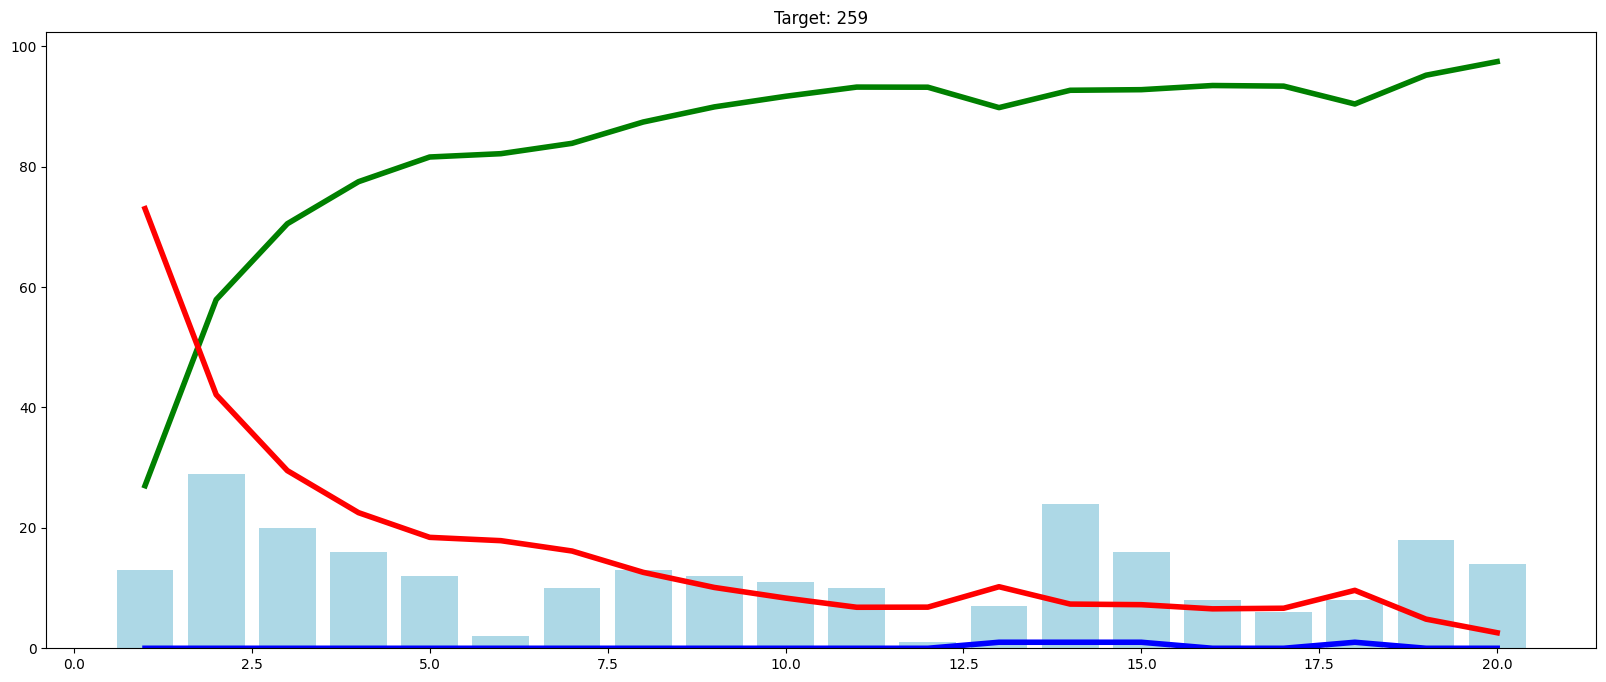

In [69]:
#visualising the match data over wise
plt.figure(figsize=(20,8))
plt.plot(new_df["over_end"], new_df["over_wickets"], color="blue", linewidth=4)
plt.plot(new_df["over_end"], new_df["win"], color="green", linewidth=4)
plt.plot(new_df["over_end"], new_df["lose"], color="red", linewidth=4)
plt.bar(new_df["over_end"], new_df["runs_over"], color="lightblue")
plt.title("Target: "+str(target))

In [70]:
#if you want better accuracy you can use random forest but wont get the probabilities in this form
# from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier(n_estimators=300, min_samples_split=5, random_state=100)
# rf_pipe = make_pipeline(
#     ct,
#     rf
# )

In [71]:
# rf_pipe.fit(x_train, y_train)

In [72]:
# rf_pred = rf_pipe.predict(x_test)
# acc = accuracy_score(y_test, rf_pred)
# acc

In [73]:
# cv_score = cross_val_score(rf_pipe, x_train, y_train, cv=5)
# cv_mean = cv_score.mean()
# cv_mean